In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import plotly.express as px
from numpy import savetxt

In [126]:
df = pd.read_excel('data/CTG.xls', sheet_name='Raw Data', header=0, skiprows=[1])
# df.drop(columns=['FileName','Date','SegFile', 'b','e','LBE'], inplace=True)
df

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,120,0,0,0,73,0.5,43,2.4,0,...,62,126,2,0,120,137,121,73,1,2
1,132,132,4,0,4,17,2.1,0,10.4,2,...,68,198,6,1,141,136,140,12,0,1
2,133,133,2,0,5,16,2.1,0,13.4,2,...,68,198,5,1,141,135,138,13,0,1
3,134,134,2,0,6,16,2.4,0,23.0,2,...,53,170,11,0,137,134,137,13,1,1
4,132,132,4,0,5,16,2.4,0,19.9,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,140,0,0,6,79,0.2,25,7.2,0,...,137,177,4,0,153,150,152,2,0,2
2122,140,140,1,0,9,78,0.4,22,7.1,0,...,103,169,6,0,152,148,151,3,1,2
2123,140,140,1,0,7,79,0.4,20,6.1,0,...,103,170,5,0,153,148,152,4,1,2
2124,140,140,1,0,9,78,0.4,27,7.0,0,...,103,169,6,0,152,147,151,4,1,2


In [53]:
# Matrix to numpy Array
data = df.to_numpy()

In [54]:
# Matriz size
data.shape

(2126, 24)

In [55]:
predict_variables = data[:, :23]
predict_variables.shape

(2126, 23)

In [56]:
response_variable = data[:, 23]
response_variable

array([2., 1., 1., ..., 2., 2., 1.])

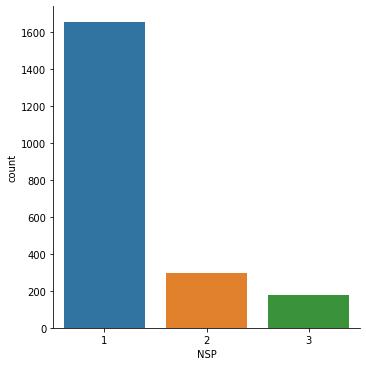

In [57]:
sns.catplot(x="NSP",data=df, kind='count',  aspect=1)

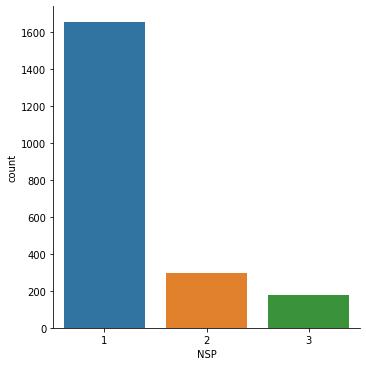

In [58]:
sns.catplot(x="NSP",data=df, kind='count',  aspect=1)

In [110]:
# Smote
smt = SMOTE(sampling_strategy='not majority')
X_smt, Y_smt = smt.fit_resample(predict_variables, response_variable)
X_smt.shape

(4965, 23)

In [111]:
# Normalización de los datos
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X_smt)

In [112]:
normalized_data

array([[0.25925926, 0.25925926, 0.        , ..., 0.40366972, 0.27137546,
        1.        ],
       [0.48148148, 0.48148148, 0.15384615, ..., 0.57798165, 0.04460967,
        0.5       ],
       [0.5       , 0.5       , 0.07692308, ..., 0.55963303, 0.04832714,
        0.5       ],
       ...,
       [0.42592593, 0.42592593, 0.        , ..., 0.30328889, 0.04110962,
        0.5       ],
       [0.5       , 0.5       , 0.        , ..., 0.27066667, 0.16617695,
        0.5       ],
       [0.82046576, 0.82046576, 0.        , ..., 0.68449818, 0.00371747,
        0.5       ]])

**Variables description**

In [113]:
Y_smt.resize

<function ndarray.resize>

In [114]:
Y_smt = np.matrix(Y_smt).T
Y_smt.shape

(4965, 1)

In [115]:
smoted_array = np.concatenate((normalized_data, Y_smt), axis=1)

In [116]:
smoted_array.shape

(4965, 24)

In [117]:
smoted_df = pd.DataFrame(smoted_array)

In [118]:
smoted_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.259259,0.259259,0.000000,0.000000,0.000000,0.813333,0.044118,0.472527,0.047337,0.000000,...,0.110092,0.034483,0.111111,0.000000,0.472441,0.587156,0.403670,0.271375,1.0,2.0
1,0.481481,0.481481,0.153846,0.000000,0.173913,0.066667,0.279412,0.000000,0.205128,0.125000,...,0.165138,0.655172,0.333333,0.100000,0.637795,0.577982,0.577982,0.044610,0.5,1.0
2,0.500000,0.500000,0.076923,0.000000,0.217391,0.053333,0.279412,0.000000,0.264300,0.125000,...,0.165138,0.655172,0.277778,0.100000,0.637795,0.568807,0.559633,0.048327,0.5,1.0
3,0.518519,0.518519,0.076923,0.000000,0.260870,0.053333,0.323529,0.000000,0.453649,0.125000,...,0.027523,0.413793,0.611111,0.000000,0.606299,0.559633,0.550459,0.048327,1.0,1.0
4,0.481481,0.481481,0.153846,0.000000,0.217391,0.053333,0.323529,0.000000,0.392505,0.000000,...,0.027523,0.413793,0.500000,0.000000,0.606299,0.577982,0.559633,0.040892,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,0.777778,0.777778,0.000000,0.002050,0.016753,0.767217,0.014706,0.819942,0.089517,0.000000,...,0.743877,0.263920,0.102446,0.000000,0.708661,0.693713,0.675364,0.000000,1.0,3.0
4961,0.518519,0.518519,0.000000,0.004269,0.000000,0.914561,0.000000,0.555522,0.099061,0.000000,...,0.722899,0.198276,0.111111,0.000000,0.590551,0.568807,0.541284,0.003717,0.5,3.0
4962,0.425926,0.425926,0.000000,0.001773,0.303076,0.719610,0.382353,0.000000,0.000000,0.380483,...,0.000000,0.191420,0.334958,0.005849,0.354331,0.110360,0.303289,0.041110,0.5,3.0
4963,0.500000,0.500000,0.000000,0.001597,0.178238,0.640000,0.388204,0.000000,0.143872,0.118783,...,0.091743,0.370690,0.283304,0.000000,0.309478,0.225708,0.270667,0.166177,0.5,3.0


In [119]:
df = px.data.tips()
fig = px.histogram(smoted_df, x=0)
fig.show()

In [120]:
fig = px.histogram(smoted_df, x=1)
fig.show()

In [121]:
fig = px.histogram(smoted_df, x=23, nbins = 5)
fig.show()

In [124]:
savetxt('data/CTGsmt.xls', smoted_df, delimiter=',')